# Introduction: Why Gradient Descent?

In many machine learning and optimization problems, our goal is to find the parameter values that minimize a given cost function — a mathematical expression that quantifies how well a model performs.

This cost function, often denoted as $J(\boldsymbol{\beta})$, depends on a set of parameters:

$$
\boldsymbol{\beta} = [\beta_0, \beta_1, \dots, \beta_p]
$$

The optimization objective is to find:

$$
\boldsymbol{\beta}^* = \arg\min_{\boldsymbol{\beta}} J(\boldsymbol{\beta})
$$

This equation says:

> *“We want to find the value of $\boldsymbol{\beta}$ that makes the cost function $J(\boldsymbol{\beta})$ as small as possible.”*

Let’s break it down:
- $\boldsymbol{\beta}$ is a set of parameters (like weights in a model).
- $J(\boldsymbol{\beta})$ is the cost or error function — it tells us **how bad** our model is with a given set of parameters.
- $\arg\min$ means: “Give me the value of $\boldsymbol{\beta}$ that makes $J(\boldsymbol{\beta})$ the smallest.”

So,
- $\boldsymbol{\beta}^*$ is the **best** set of parameters — the one that **minimizes the cost**.

In simple cases, this can be achieved analytically. But in most real-world applications — especially those involving large datasets or complex models like neural networks — a closed-form solution is either **infeasible** or **non-existent**.

This is where **gradient-based optimization** techniques come in.

### What Is Gradient Descent?

**Gradient Descent** is a widely used iterative optimization algorithm that seeks to minimize the cost function by taking steps proportional to the **negative of the gradient** at the current point. In other words:

> Move in the direction that most rapidly decreases the cost.

<div align="center">
  <img src="https://i.sstatic.net/L0B4L.png" alt="IQR" width="500" height="330"/>
</div>

At each iteration, the parameter vector is updated using the rule:

$$
\boxed{
\boldsymbol{\beta} := \boldsymbol{\beta} - \alpha \cdot \nabla J(\boldsymbol{\beta})
}
$$

$$
\boxed{
\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - \alpha \cdot \nabla J(\boldsymbol{\beta}^{(t)})
}
$$

Where:
- $\alpha$ is the **learning rate**(a small positive scalar),
- $J(\boldsymbol{\beta})$ is any differentiable cost function (e.g., MSE, cross-entropy, hinge loss, etc.),
- $\nabla J(\boldsymbol{\beta})$ is the **gradient vector**, containing partial derivatives of the cost function with respect to each parameter:

$$
\nabla J(\boldsymbol{\beta}) = 
\left[
\frac{\partial J}{\partial \beta_0}, \;
\frac{\partial J}{\partial \beta_1}, \;
\dots, \;
\frac{\partial J}{\partial \beta_p}
\right]
$$

Each component of the gradient tells us how sensitive the cost function is to changes in the corresponding parameter.

### Why Does It Work?

The gradient vector always points in the direction of **steepest ascent** of the cost function. By moving in the **opposite direction**, gradient descent ensures that we gradually move toward a **local minimum** of the cost.

### Gradient Descent in Practice

Although conceptually simple, gradient descent can behave in **unexpected and inefficient ways** depending on factors like:
- **Initialization**: Where you start matters — poor initial guesses can lead to slow convergence or local minima.
- **Learning rate**: Too small and convergence is slow; too large and the algorithm may **diverge** or oscillate.
- **Curvature of the cost surface**: Sharp valleys or flat plateaus can make progress inefficient.
- **Feature scaling** and **saddle points** may also introduce further challenges.

In the following sections, we’ll explore these behaviors in depth — not just how to implement gradient descent, but **how it behaves under different conditions**, and what you can do to make it work more effectively.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from matplotlib import cm # color map
#from mpl_toolkits import mplot3d # 3D plot required library
#from mpl_toolkits.mplot3d.axes3d import Axes3D
from sympy import symbols, diff
from math import log

# Case Study 1: How Starting Point Affects Gradient Descent Efficiency

Gradient Descent is an iterative optimization algorithm. In this case study, we demonstrate how the **initial starting point** directly affects the **number of iterations** required to reach the minimum.

We define a basic quadratic function as a simulated cost function:

$$f(x) = x^2 + x + 1$$

Its derivative (gradient):

$$f’(x) = 2x + 1$$

```python
# Gradient Descent implementation
def gradient_descent(start_x, learning_rate=0.1, precision=1e-5):
    x_list = [start_x]
    slope_list = [df(start_x)]
    new_x = start_x
    iteration = 0

    while True:
        prev_x = new_x
        grad = df(prev_x)
        new_x = prev_x - learning_rate * grad

        x_list.append(new_x)
        slope_list.append(df(new_x))
        iteration += 1

        if abs(new_x - prev_x) < precision:
            break

    return x_list, slope_list, iteration
```

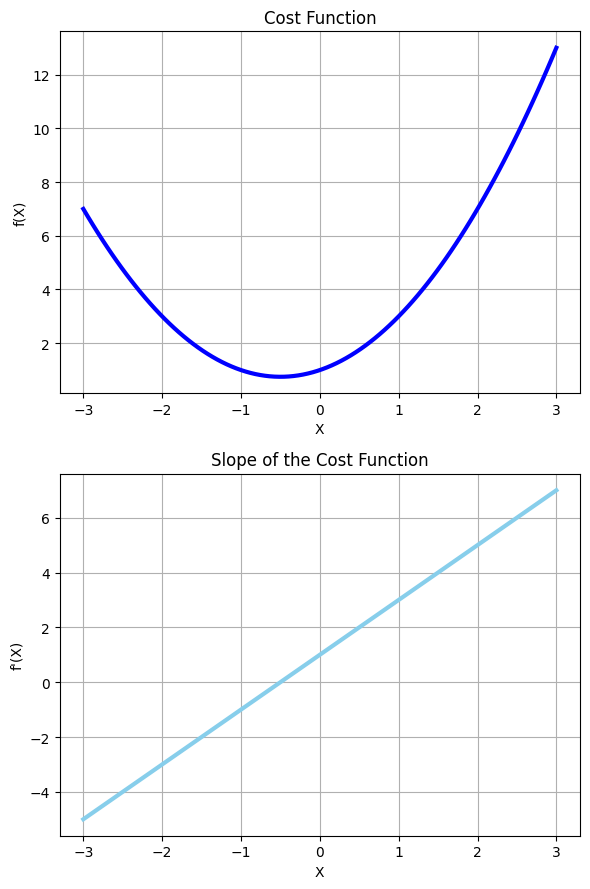

In [23]:
def f(x):
    return x**2 + x + 1

def df(x):
    return 2*x + 1

# Generate x values
x_1 = np.linspace(start=-3, stop=3, num=100)

# Plot cost function and its slope
plt.figure(figsize=(6,9))

# 1. Cost Function
plt.subplot(2,1,1)
plt.title('Cost Function')
plt.plot(x_1, f(x_1), color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.grid()

# 2. Derivative
plt.subplot(2,1,2)
plt.title('Slope of the Cost Function')
plt.plot(x_1, df(x_1), color='skyblue', linewidth=3)
plt.xlabel('X')
plt.ylabel("f'(X)")
plt.grid()

plt.tight_layout()
plt.show()

In [3]:
# Initialize
iteration = 0
x_list = []
slope_list = []

# Gradient descent function with iteration tracking
def gradient_descent(start_x, learning_rate=0.1, precision=1e-5):
    x_list = [start_x]
    slope_list = [df(start_x)]
    new_x = start_x
    iteration = 0

    while True:
        prev_x = new_x
        grad = df(prev_x)
        new_x = prev_x - learning_rate * grad

        x_list.append(new_x)
        slope_list.append(df(new_x))
        iteration += 1

        if abs(new_x - prev_x) < precision:
            break

    return x_list, slope_list, iteration

# Run gradient descent from two starting points
x_list_A, slope_list_A, iter_A = gradient_descent(start_x=3)
x_list_B, slope_list_B, iter_B = gradient_descent(start_x=-1)

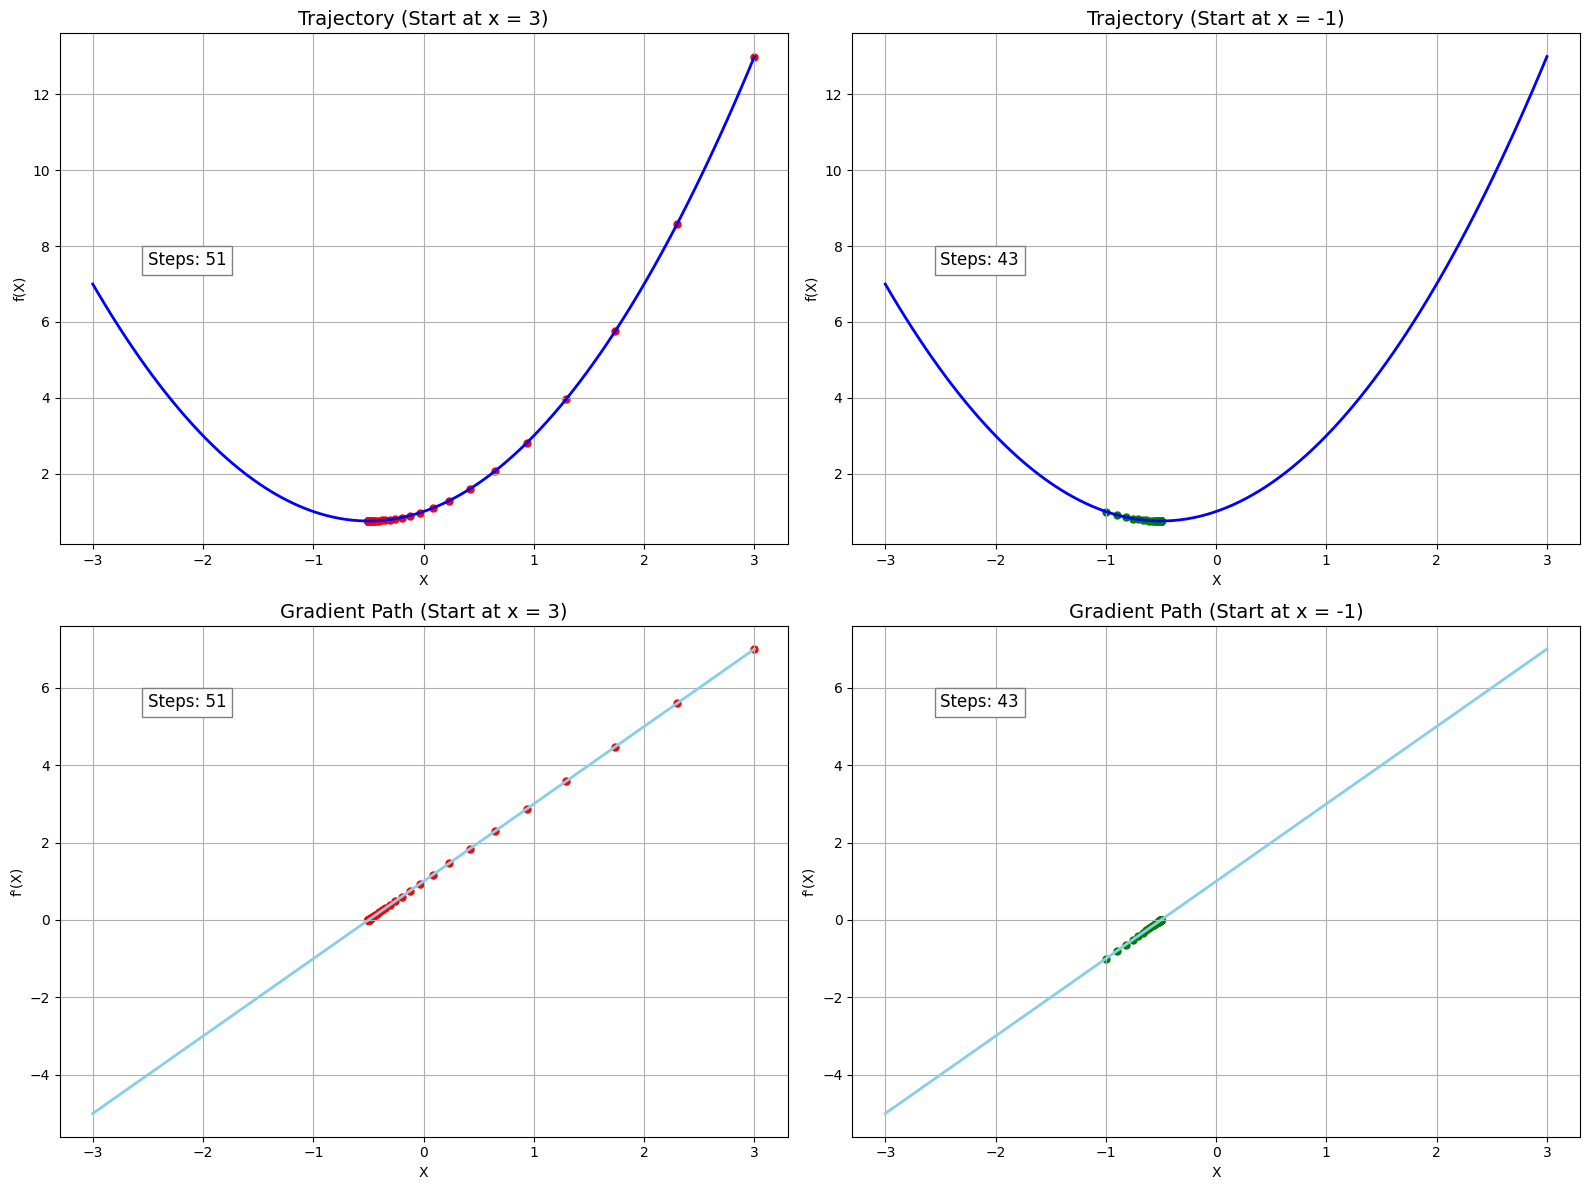

In [5]:
# Setup
x_vals = np.linspace(-3, 3, 100)

# Plot
plt.figure(figsize=(16, 12))

# --- Top-left: Trajectory from x=3 ---
plt.subplot(2, 2, 1)
plt.title('Trajectory (Start at x = 3)', fontsize=14)
plt.plot(x_vals, f(x_vals), color='blue', linewidth=2)
plt.scatter(x_list_A, f(np.array(x_list_A)), color='red', s=25)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.grid()
plt.text(-2.5, 7.5, f'Steps: {iter_A}', fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='gray'))

# --- Top-right: Trajectory from x=-1 ---
plt.subplot(2, 2, 2)
plt.title('Trajectory (Start at x = -1)', fontsize=14)
plt.plot(x_vals, f(x_vals), color='blue', linewidth=2)
plt.scatter(x_list_B, f(np.array(x_list_B)), color='green', s=25)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.grid()
plt.text(-2.5, 7.5, f'Steps: {iter_B}', fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='gray'))

# --- Bottom-left: Slope from x=3 ---
plt.subplot(2, 2, 3)
plt.title("Gradient Path (Start at x = 3)", fontsize=14)
plt.plot(x_vals, df(x_vals), color='skyblue', linewidth=2)
plt.scatter(x_list_A, slope_list_A, color='red', s=25)
plt.xlabel('X')
plt.ylabel("f'(X)")
plt.grid()
plt.text(-2.5, 5.5, f'Steps: {iter_A}', fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='gray'))

# --- Bottom-right: Slope from x=-1 ---
plt.subplot(2, 2, 4)
plt.title("Gradient Path (Start at x = -1)", fontsize=14)
plt.plot(x_vals, df(x_vals), color='skyblue', linewidth=2)
plt.scatter(x_list_B, slope_list_B, color='green', s=25)
plt.xlabel('X')
plt.ylabel("f'(X)")
plt.grid()
plt.text(-2.5, 5.5, f'Steps: {iter_B}', fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='gray'))

plt.tight_layout()
plt.show()

### Observation

This experiment confirms that the s**tarting point of Gradient Descent significantly affects convergence efficiency**, even for a simple convex function like:

$$f(x) = x^2 + x + 1$$
- When starting at x = 3, it takes **51 steps** to reach the minimum.
- When starting at x = -1, it takes **43 steps**, despite being closer to the true minimum at x = -0.5.

| Starting Point | Steps to Converge | Distance from Minimum | Initial Gradient | Comments |
|----------------|-------------------|------------------------|------------------|----------|
| `x = 3`        | 51                | 3.5 units              | Large positive   | Overshoots initially, then slowly descends |
| `x = -1`       | 43                | 0.5 units              | Small negative   | Starts closer, but smaller slope leads to slower early movement |

- A **larger initial slope** can sometimes help move faster initially, but risks oscillations or overshooting if learning rate is not well-tuned.
- A **smaller slope** near the minimum might cause slower early updates, even though the point is closer to the optimum.
- Thus, **"closer ≠ always faster"** if the slope is too flat.

### Takeaway

> **Gradient Descent is sensitive to the initial point.**
>
> Even on a simple quadratic, the step count can vary significantly based on the distance to the minimum and the steepness of the slope at the starting point.

In real-world high-dimensional problems:
- Poor initialization can lead to **slow convergence** or **getting stuck in plateaus**.
- Good initialization strategies (e.g., Xavier, He) are **not just tricks**—they are **essential for performance**.

### Practical Implication

How to Choose a Good Initial Value in Gradient Descent? The choice of initial value affects **convergence speed**, **stability**, and whether the model can **escape poor local minima**. Here’s how to do it right:

1. If the Problem is Convex (e.g., Linear Regression)

- You **can choose any random value**, and gradient descent will eventually converge.
- But:
  - Starting **too far from the minimum** → slow convergence
  - Starting **in a flat region** → small gradients, slow updates

**Tip:**  
Use small random values near 0, like:

```python
x_init = np.random.uniform(-1, 1)
```

2. If the Problem is Non-Convex (e.g., Neural Networks)

Poor initialization can cause:
- Vanishing or exploding gradients
- Getting stuck in poor local minima
- Failed or slow convergence

Xavier Initialization (Glorot)

Best for sigmoid, tanh, etc.

$$
W \sim \mathcal{U}\left[-\frac{\sqrt{6}}{\sqrt{n_{\text{in}} + n_{\text{out}}}}, \frac{\sqrt{6}}{\sqrt{n_{\text{in}} + n_{\text{out}}}}\right]
$$

He Initialization

Best for ReLU, LeakyReLU:

$$
W \sim \mathcal{N}(0, \sqrt{\frac{2}{n_{\text{in}}}})
$$

3. Data-aware Initialization
- Normalize inputs: mean = 0, std = 1
- Use domain knowledge if available
- For time-series/spatial problems, initialize from recent values or bounded centers

4. Multi-start Strategy (Random Restarts)
- Try several random initializations
- Pick the one that converges to the lowest cost

```python
best_result = min([gradient_descent(x0) for x0 in range(-3, 4)], key=lambda res: res.cost)
```

# Case Study 2: Divergence and Overflow in Gradient Descent

In this case study, we explore a **non-convex cost function** that exhibits **divergence** when the learning rate is too high, causing the algorithm to **overflow** instead of converge.

The cost function is defined as:

$$
t(x) = x^5 - 2x^4 + 2
$$

Its derivative (gradient) is:

$$
t'(x) = 5x^4 - 8x^3
$$

In [16]:
def gradient_descent(derivative_func, initial_guess, learning_rate=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    multiplier = learning_rate
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    step_size = precision + 1
    iter_num = 1

    while step_size > precision:
        if iter_num > max_iter:
            break
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        iter_num += 1
    return new_x, x_list, slope_list

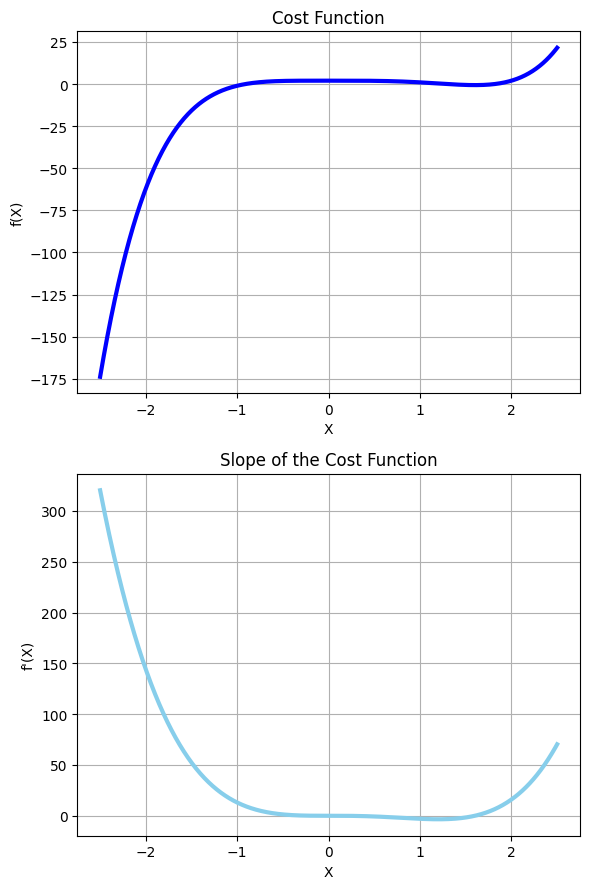

In [34]:
# Generating data
x_2 = np.linspace(start=-2.5, stop=2.5, num=1000)
def t(x):
    return x**5 - 2*x**4 + 2

def dt(x):
    return 5*x**4 - 8*x**3

# Plot cost function and its slope
plt.figure(figsize=(6,9))

# 1. Cost Function
plt.subplot(2,1,1)
plt.title('Cost Function')
plt.plot(x_2, t(x_2), color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.grid()

# 2. Derivative
plt.subplot(2,1,2)
plt.title('Slope of the Cost Function')
plt.plot(x_2, dt(x_2), color='skyblue', linewidth=3)
plt.xlabel('X')
plt.ylabel("f'(X)")
plt.grid()

plt.tight_layout()
plt.show()

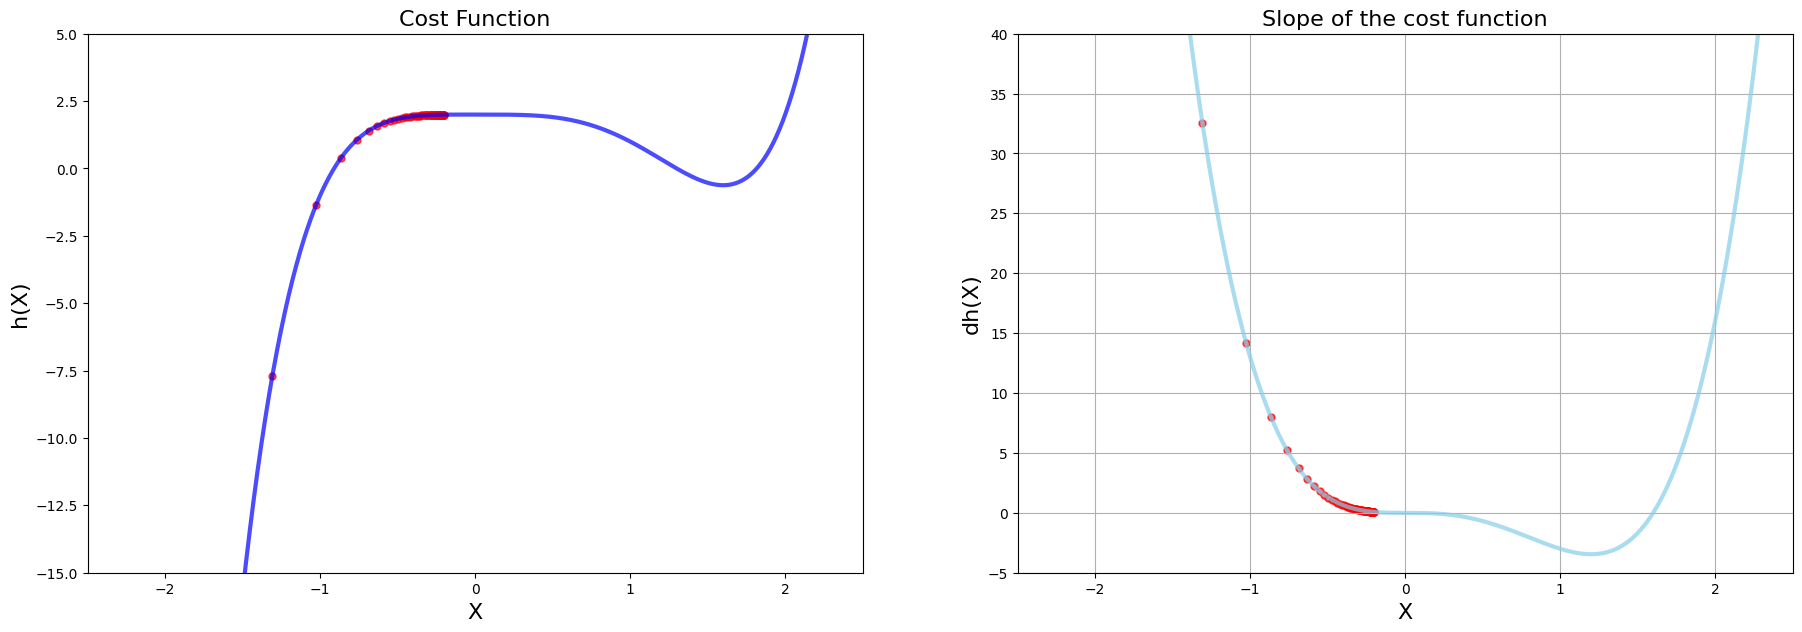

In [45]:

# Calling gradient descent function
local_min3, x_list3, slope_list3 = gradient_descent(derivative_func=dt, initial_guess=-0.2, learning_rate=0.02, precision=0.001, max_iter= 70)


plt.figure(figsize=(22,7))

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize = 16)
plt.xlim(-2.5 , 2.5)
plt.ylim(-15, 5)
plt.xlabel('X', fontsize = 16)
plt.ylabel('h(X)', fontsize = 16)
plt.plot(x_2,t(x_2), color = 'blue', linewidth = 3, alpha = 0.7)

plt.scatter(x_list3,t(np.array(x_list3)), color ='red', s = 25, alpha=0.7)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dh(X)', fontsize = 16)
plt.xlim(-2.5, 2.5)
plt.ylim(-5,40)
plt.grid()
plt.plot(x_2,dt(x_2), color ='skyblue', linewidth = 3, alpha = 0.7)
plt.scatter(x_list3, slope_list3, color ='red', s = 25, alpha=0.7)

plt.show()

### Observations

- **Divergence**: The algorithm starts at the initial guess (x = -0.2) and moves leftward with increasing steps, causing the cost function to increase. If we did not set the iteration limit, the gradient descent would continue to move away from the minimum.

- **Overflow**: As the gradient descent steps become excessively large due to the high learning rate, the computed values for the cost function and its gradient grow uncontrollably. This results in overflow, where the cost function value becomes extremely large or even reaches computational limits (inf or very large numbers). This overflow prevents meaningful updates, and the algorithm fails to converge.

> **Divergence Explanation**: In gradient descent, **divergence** refers to the phenomenon where, during the iterative process of updating parameters, the value of the loss function does not decrease but instead increases continuously, ultimately moving away from the optimal solution.

### Takeaway

1. **Learning rate selection is crucial**:  
   A learning rate that is too large can cause **divergence** during the gradient descent process, where the loss function value increases rather than decreases. On the other hand, a learning rate that is too small results in **slow convergence**, wasting computational resources.

2. **Causes of divergence**:
   - **High learning rate**: Large update steps may overshoot the optimal solution, causing the results to move away from the target.
   - **Unnormalized features**: When input features have significantly different scales, the gradient descent updates will be inconsistent across directions, leading to divergence.
   - **Noise in the data**: Noise or outliers in the data can affect the stability of gradient descent, leading to divergence.

3. **Prevent divergence by adjusting the learning rate**:  
   A suitable learning rate helps gradient descent converge stably, while a high learning rate leads to divergence. Starting with a smaller learning rate and gradually adjusting it can effectively prevent this issue.


### Practical Implication

1. **Adjust the learning rate**:  
   - **Start with a small learning rate** (e.g., \( \alpha = 0.01 \)), then gradually increase it and observe the effect on convergence speed.
   - **Use learning rate scheduling**: Techniques like learning rate decay or adaptive learning rate methods (such as Adam) can dynamically adjust the learning rate to improve training efficiency.

2. **Normalize input data**:  
   Standardize or normalize the data to ensure all features have similar scales. This can significantly enhance the stability of gradient descent and prevent divergence caused by extreme values in some features.

3. **Consider using adaptive optimizers**:  
   For cases where divergence or slow convergence is a problem, **adaptive learning rate methods** such as **Adam** or **RMSProp** can be used. These methods dynamically adjust the learning rate for each parameter, preventing divergence and speeding up convergence.


# Case Study 3: Impact of Learning Rate on Gradient Descent

In this case study, we explore how the **choice of learning rate** affects the convergence behavior of gradient descent, using the non-convex cost function:

$$
h(x) = x^4 - 4x^2 + 5
$$

Its derivative is:

$$
h'(x) = 4x^3 - 8x
$$

The learning rate $\alpha$(alpha) or $ \gamma $(gamma) controls how large each update step is. It has a profound impact on the efficiency and stability of optimization.

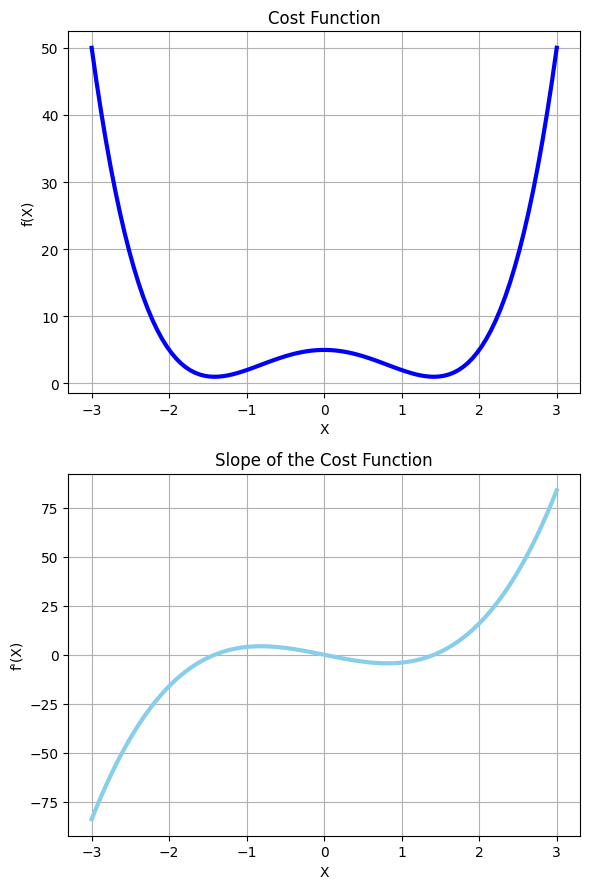

In [46]:
def h(x):
    return x**4 - 4 * x**2 + 5

def dh(x):
    return 4 * x**3 - 8 * x

# Generate x values
x_1 = np.linspace(start=-3, stop=3, num=100)

# Plot cost function and its slope
plt.figure(figsize=(6,9))

# 1. Cost Function
plt.subplot(2,1,1)
plt.title('Cost Function')
plt.plot(x_1, h(x_1), color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.grid()

# 2. Derivative
plt.subplot(2,1,2)
plt.title('Slope of the Cost Function')
plt.plot(x_1, dh(x_1), color='skyblue', linewidth=3)
plt.xlabel('X')
plt.ylabel("f'(X)")
plt.grid()

plt.tight_layout()
plt.show()

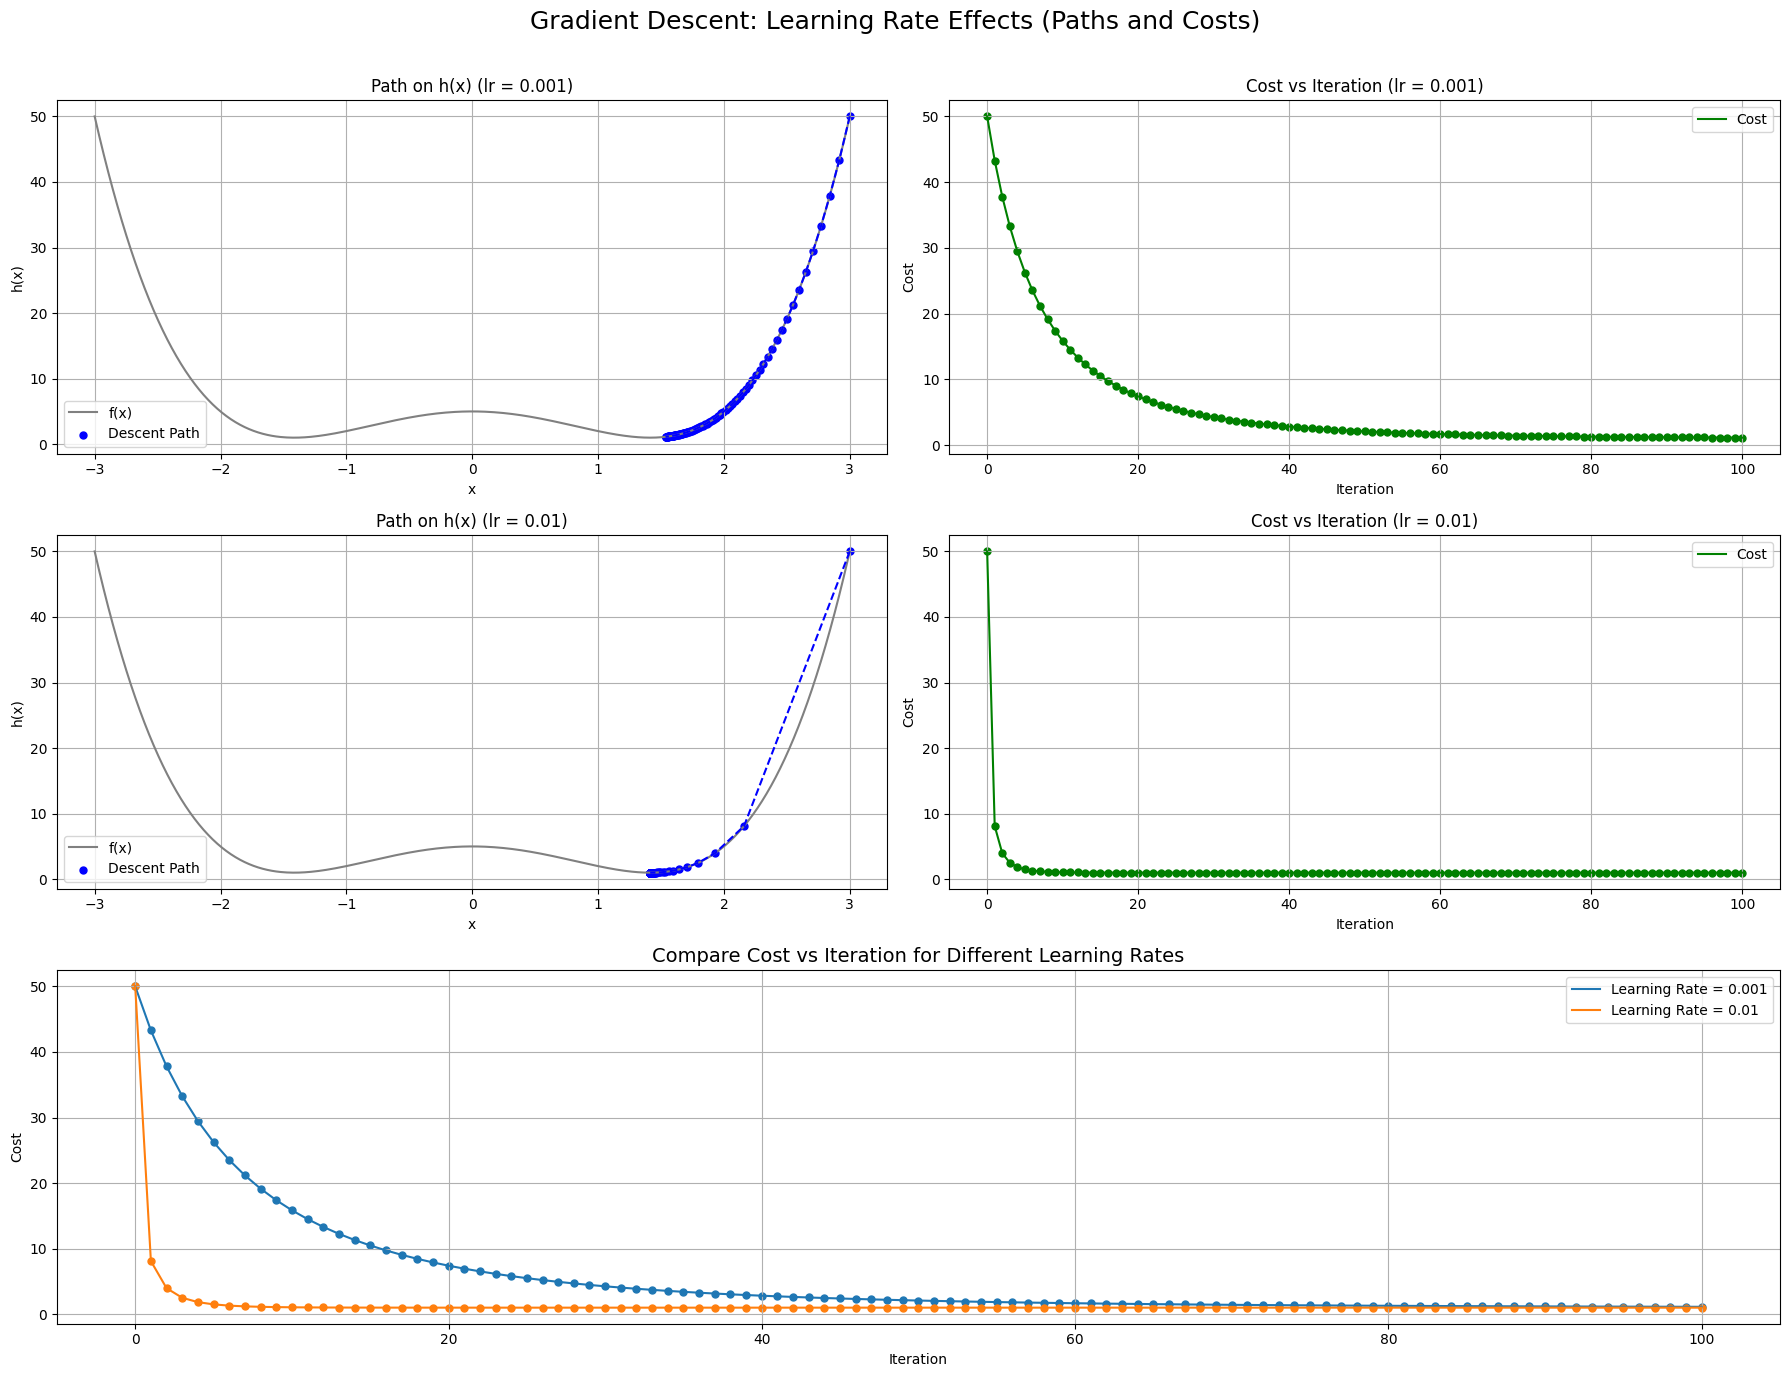

In [12]:
def gradient_descent(derivative_func, initial_guess, learning_rate=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    multiplier = learning_rate
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    step_size = precision + 1
    iter_num = 1

    while step_size > precision:
        if iter_num > max_iter:
            break
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        iter_num += 1
    return new_x, x_list, slope_list

n = 100
lrs = [0.001, 0.01]
initial_guess = 3
results = {}
for lr in lrs:
    results[lr] = gradient_descent(dh, initial_guess=initial_guess, learning_rate=lr, precision=0, max_iter=n)

# 创建整个排版画布
fig = plt.figure(figsize=(18, 14))
gs = GridSpec(3, 2, figure=fig)  # 3 行 2 列：2x2 path 图 + 1 行 cost 比较图

x_vals = np.linspace(-3, 3, 500)
f_vals = h(x_vals)

# 子图1~4：路径图 + cost 曲线
for idx, lr in enumerate(lrs):
    out = results[lr]
    x_path = np.array(out[1])
    cost_path = h(x_path)
    iteration_list = list(range(len(x_path)))

    # 左图：函数路径图
    ax_func = fig.add_subplot(gs[idx, 0])
    ax_func.plot(x_vals, f_vals, color='gray', label='f(x)')
    ax_func.scatter(x_path, h(x_path), color='blue', s=25, label='Descent Path')
    ax_func.plot(x_path, h(x_path), color='blue', linestyle='--')
    ax_func.set_title(f'Path on h(x) (lr = {lr})')
    ax_func.set_xlabel('x')
    ax_func.set_ylabel('h(x)')
    ax_func.legend()
    ax_func.grid(True)

    # 右图：cost 曲线
    ax_cost = fig.add_subplot(gs[idx, 1])
    ax_cost.plot(iteration_list, cost_path, color='green', label='Cost')
    ax_cost.scatter(iteration_list, cost_path, color='green', s=25)
    ax_cost.set_title(f'Cost vs Iteration (lr = {lr})')
    ax_cost.set_xlabel('Iteration')
    ax_cost.set_ylabel('Cost')
    ax_cost.legend()
    ax_cost.grid(True)

# 第5图：合并所有 cost 曲线对比
ax_all_cost = fig.add_subplot(gs[2, :])
for lr in lrs:
    x_path = np.array(results[lr][1])
    iteration_list = list(range(len(x_path)))
    ax_all_cost.plot(iteration_list, h(x_path), label=f'Learning Rate = {lr}')
    ax_all_cost.scatter(iteration_list, h(x_path), s=25)
ax_all_cost.set_title('Compare Cost vs Iteration for Different Learning Rates', fontsize=14)
ax_all_cost.set_xlabel('Iteration')
ax_all_cost.set_ylabel('Cost')
ax_all_cost.legend()
ax_all_cost.grid(True)

# 总标题
fig.suptitle('Gradient Descent: Learning Rate Effects (Paths and Costs)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # 留出上方空间给标题
plt.show()

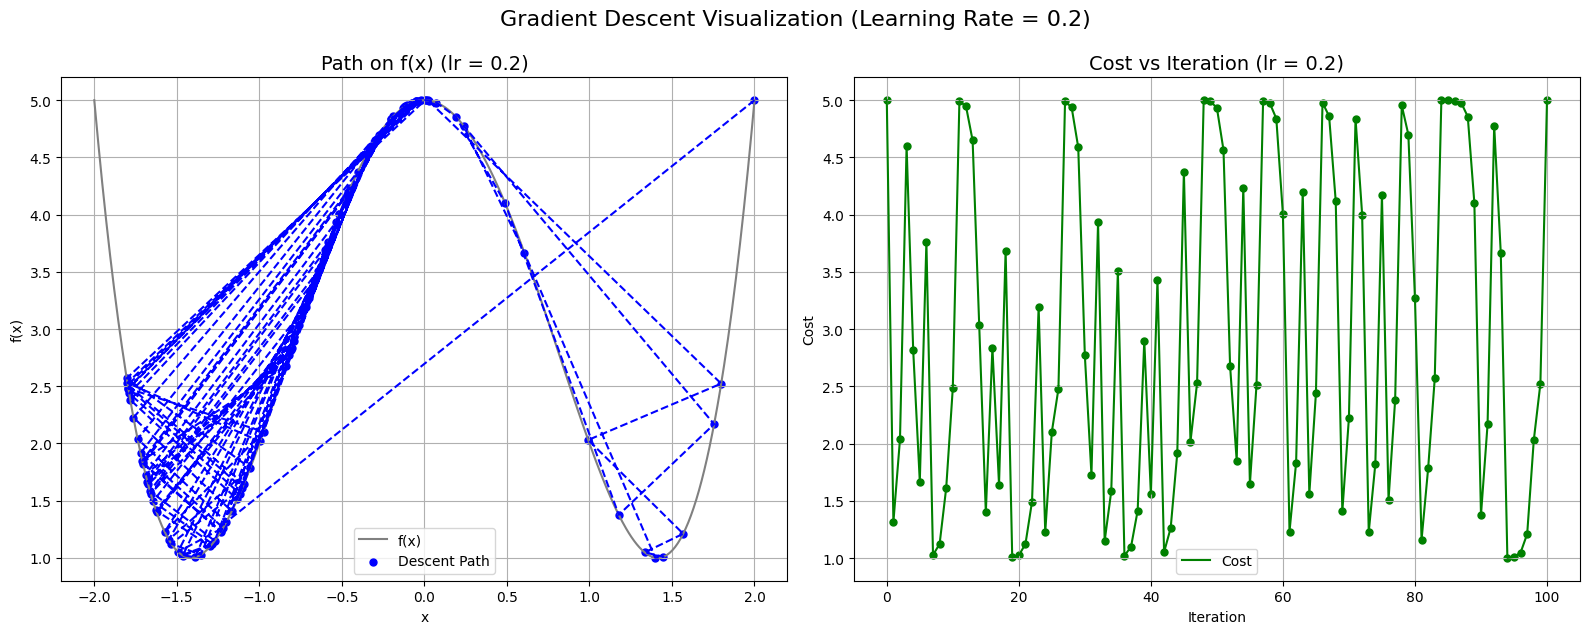

In [13]:
# 参数设置
n = 100
lr = 0.2
initial_guess = 2
_, x_path, _ = gradient_descent(dh, initial_guess=initial_guess, learning_rate=lr, precision=0, max_iter=n)

# 函数图数据
x_vals = np.linspace(-2, 2, 500)
f_vals = h(x_vals)
cost_path = h(np.array(x_path))
iteration_list = list(range(len(x_path)))

# 开始画图（1行2列）
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 左图：函数 + 路径
axes[0].plot(x_vals, f_vals, color='gray', label='f(x)')
axes[0].scatter(x_path, h(np.array(x_path)), color='blue', s=25, label='Descent Path')
axes[0].plot(x_path, h(np.array(x_path)), color='blue', linestyle='--')
axes[0].set_title(f'Path on f(x) (lr = {lr})', fontsize=14)
axes[0].set_xlabel('x')
axes[0].set_ylabel('f(x)')
axes[0].legend()
axes[0].grid(True)

# 右图：cost 曲线
axes[1].plot(iteration_list, cost_path, color='green', label='Cost')
axes[1].scatter(iteration_list, cost_path, color='green', s=25)
axes[1].set_title(f'Cost vs Iteration (lr = {lr})', fontsize=14)
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Cost')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.suptitle('Gradient Descent Visualization (Learning Rate = 0.2)', fontsize=16, y=1.05)
plt.show()

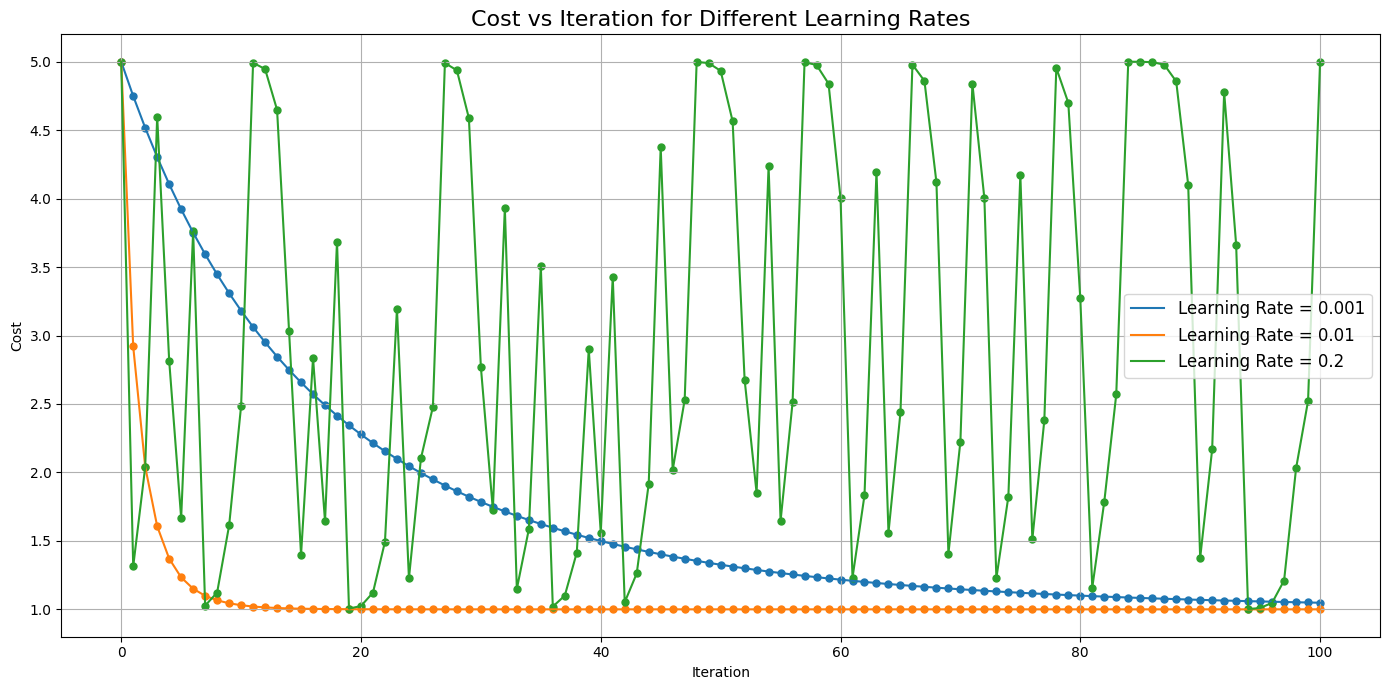

In [15]:
lrs = [0.001, 0.01, 0.2]
initial_guess = 2
n = 100
results = {}

for lr in lrs:
    results[lr] = gradient_descent(dh, initial_guess=initial_guess, learning_rate=lr, precision=0, max_iter=n)

# 画图
plt.figure(figsize=(14, 7))
for lr in lrs:
    x_path = np.array(results[lr][1])
    cost_path = h(x_path)
    iteration_list = range(len(cost_path))
    plt.plot(iteration_list, cost_path, label=f'Learning Rate = {lr}')
    plt.scatter(iteration_list, cost_path, s=25)

plt.title('Cost vs Iteration for Different Learning Rates', fontsize=16)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Observations

1. A Proper Learning Rate Can Accelerate Convergence

   - A larger learning rate means **larger steps** are taken along the negative gradient direction.
   - When the learning rate is **well-chosen** (e.g., `γ = 0.01`), the algorithm can reach the minimum **significantly faster** than a smaller learning rate (e.g., `γ = 0.001`).
   - The **cost vs. iteration** plot shows a **steeper decline**, reducing the number of iterations required to approach the optimal point.
   - This is especially helpful when dealing with large-scale datasets or high-dimensional models where iteration cost is expensive.
   - A moderately increased learning rate can improve convergence speed without sacrificing stability.
   - Faster convergence is desirable in large-scale or high-dimensional problems.

2. A Too-High Learning Rate Can Lead to Oscillations or Divergence

   - When the learning rate becomes **too large** (e.g., `γ = 0.2`), it can cause the algorithm to **overshoot the minimum**, jumping back and forth across it.
   - In our function, this manifests as **zigzag motion** in the path plot and **non-monotonic cost behavior** in the cost plot.
   - Instead of stabilizing at the minimum, the algorithm **oscillates** and may even **fail to converge** if the overshooting grows worse.
   - Higher learning rate may compromise convergence and lead to oscillatory or divergent behavior.

### Takeaway

| Learning Rate      | Behavior                         | Trade-off                            |
|--------------------|----------------------------------|--------------------------------------|
| Too Small  | Very slow convergence             | Stable but inefficient               |
| Good       | Fast and smooth convergence       | Optimal choice (requires tuning)     |
| Too Large    | Oscillation or divergence         | Fast updates but unstable            |

- Learning rate must be **carefully balanced** to trade off between **speed** and **stability**.

> Selecting a good learning rate is one of the most critical decisions in gradient descent-based optimization.  
> When possible, visualize the **cost trajectory** and **parameter path** to diagnose potential issues like oscillation or stagnation.
>
> In modern machine learning, consider **adaptive optimizers** to dynamically adjust learning rate and improve convergence robustness.

### Practical Implication

- **Adaptive learning rate methods** (often used in deep learning) aim to solve the problem of manual tuning:
  
  - `AdaGrad`: Adjusts the learning rate individually for each parameter based on the past gradients.
  
  - `RMSProp`: Improves AdaGrad by preventing the learning rate from shrinking too much.
  
  - `Adam`: Combines momentum and RMSProp techniques; widely adopted for its robustness and effectiveness.

These methods make learning more stable and often remove the need to manually choose a fixed global learning rate.


# Case Study 4: Multiple Minima in a Non-Convex Cost Function

We now analyze a new cost function, This is a **non-convex** function — it has more than one valley (local minimum), unlike a simple U-shaped parabola:

$$g(x) = x^4 - 4x^2 + 0.5x + 5$$

Its derivative (gradient):

$$g{\prime}(x) = 4x^3 - 8x + 0.5$$

We want to understand:
1. Can Gradient Descent always find the global minimum?
2. What happens when the function has more than one valley (local minimum)?
3. How do different initial guesses affect convergence?

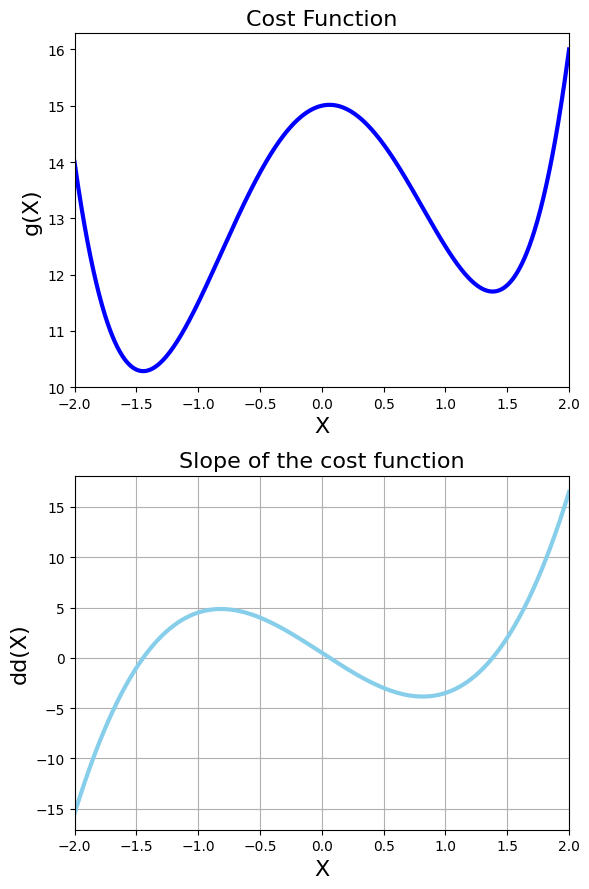

In [47]:
# Generating some data
x_2 = np.linspace(start = -2, stop = 2, num = 1000)

def g(x):
    return x**4 - 4*x**2 + 0.5*x + 15

def dg(x):
    return 4*x**3 - 8*x + 0.5

plt.figure(figsize=(6,9))

# 1 Chart: Cost Function
plt.subplot(2,1,1)
plt.title('Cost Function', fontsize = 16)
plt.xlim(-2,2)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(X)', fontsize = 16)
plt.plot(x_2,g(x_2), color = 'blue', linewidth = 3)

# 2 Chart: Derivative
plt.subplot(2,1,2)
plt.title('Slope of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dd(X)', fontsize = 16)
plt.xlim(-2,2)
plt.grid()
plt.plot(x_2,dg(x_2), color ='skyblue', linewidth = 3)

plt.tight_layout()
plt.show()

In [6]:
def gradient_descent(derivative_func, initial_guess, learning_rate = 0.02, precision = 0.001, max_iter = 300):
    new_x = initial_guess
    multiplier = learning_rate

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    step_size = precision + 1
    iter_num = 1

    while step_size > precision:        
        if iter_num > max_iter:
            break 

        previous_x = new_x
        gradient = derivative_func(previous_x) # calculating slope
        new_x = previous_x - multiplier * gradient # Updating X value

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        iter_num = iter_num + 1
    
    return new_x, x_list, slope_list

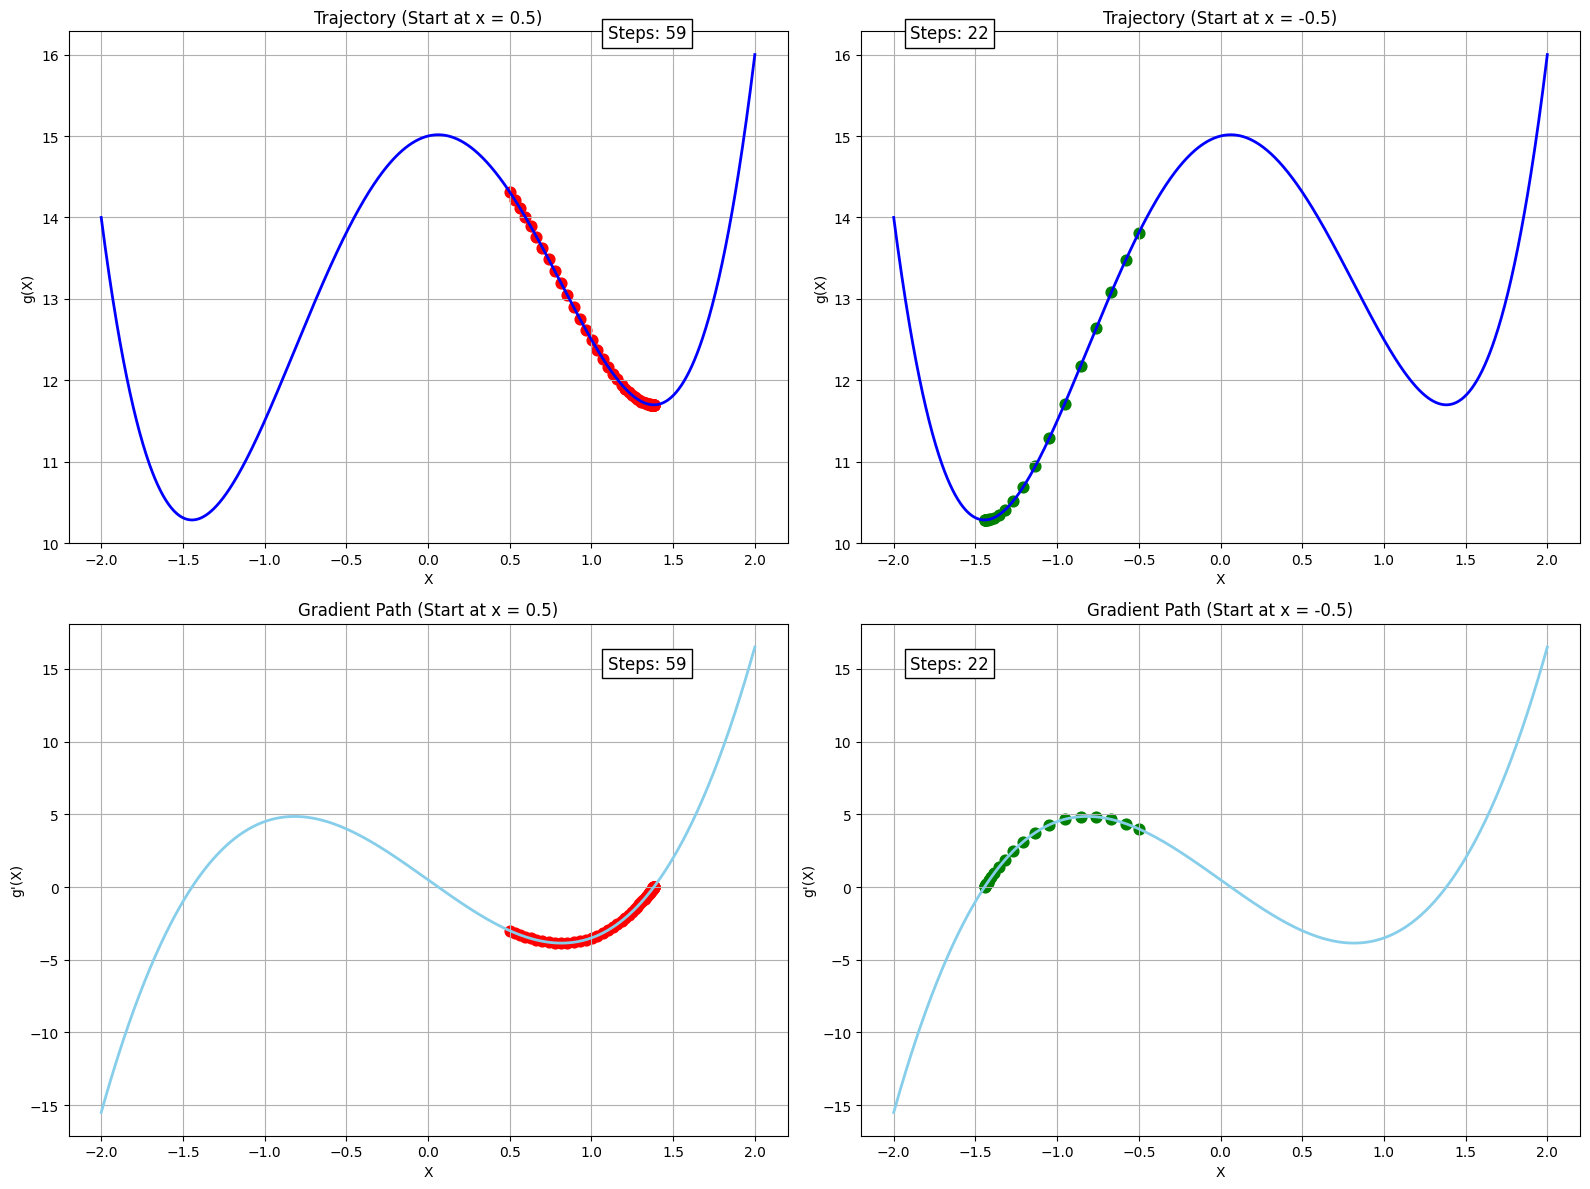

In [7]:
# Run two experiments
local_min_1, x_list1, slope_list1 = gradient_descent(dg, 0.5, learning_rate=0.01, precision=0.0001)
local_min_2, x_list2, slope_list2 = gradient_descent(dg, -0.5, learning_rate=0.02, precision=0.001)

# Generate x axis for plotting
x_vals = np.linspace(-2, 2, 1000)

# Plotting 2x2
plt.figure(figsize=(16, 12))

# --- Top-left: Cost Function (x = 0.5) ---
plt.subplot(2, 2, 1)
plt.title('Trajectory (Start at x = 0.5)')
plt.plot(x_vals, g(x_vals), color='blue', linewidth=2)
plt.scatter(x_list1, g(np.array(x_list1)), color='red', s=60)
plt.xlabel('X')
plt.ylabel('g(X)')
plt.grid()
plt.text(1.1, 16.2, f'Steps: {len(x_list1)}', fontsize=12, bbox=dict(facecolor='white'))

# --- Top-right: Cost Function (x = -0.5) ---
plt.subplot(2, 2, 2)
plt.title('Trajectory (Start at x = -0.5)')
plt.plot(x_vals, g(x_vals), color='blue', linewidth=2)
plt.scatter(x_list2, g(np.array(x_list2)), color='green', s=60)
plt.xlabel('X')
plt.ylabel('g(X)')
plt.grid()
plt.text(-1.9, 16.2, f'Steps: {len(x_list2)}', fontsize=12, bbox=dict(facecolor='white'))

# --- Bottom-left: Gradient (x = 0.5) ---
plt.subplot(2, 2, 3)
plt.title("Gradient Path (Start at x = 0.5)")
plt.plot(x_vals, dg(x_vals), color='skyblue', linewidth=2)
plt.scatter(x_list1, slope_list1, color='red', s=60)
plt.xlabel('X')
plt.ylabel("g'(X)")
plt.grid()
plt.text(1.1, 15, f'Steps: {len(x_list1)}', fontsize=12, bbox=dict(facecolor='white'))

# --- Bottom-right: Gradient (x = -0.5) ---
plt.subplot(2, 2, 4)
plt.title("Gradient Path (Start at x = -0.5)")
plt.plot(x_vals, dg(x_vals), color='skyblue', linewidth=2)
plt.scatter(x_list2, slope_list2, color='green', s=60)
plt.xlabel('X')
plt.ylabel("g'(X)")
plt.grid()
plt.text(-1.9, 15, f'Steps: {len(x_list2)}', fontsize=12, bbox=dict(facecolor='white'))

plt.tight_layout()
plt.show()

### Observation

This example reveals key limitations of gradient descent when applied to **non-convex** functions:
- Different starting points lead to different local minima
- Without prior knowledge of the cost surface, you cannot:
	1.	Guarantee convergence to the global minimum
	2.	Know how many minima exist

This behavior is typical in optimization problems involving **non-convex functions** (e.g., neural networks, energy landscapes, etc.)

### Takeaway

- Gradient Descent can get trapped in local minima when the cost function is non-convex.
- The algorithm is not aware of the global structure of the cost surface.
- Choosing different starting points will lead to different solutions, and the result is not guaranteed to be optimal.

### Practical Implication

To address these issues:
- Use **multiple random initializations** to increase the chance of finding a better solution.
- Try **[Stochastic Gradient Descent (SGD)](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)** or **simulated annealing**, which introduce randomness and may help escape local minima.
- Consider advanced optimizers like **Adam**, **RMSProp**, or **momentum-based methods**.

More reading on [Stochastic Gradient Descent (SGD)](https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/)

> ### Example - Data Viz with 3D Charts

$$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$

minimise $$f(x,y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2-y^2}$

In [18]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1 / ( r + 1)

# Generating data
# X data type is numpy array
X = np.linspace(start = -2, stop = 2, num = 200) 
y = np.linspace(start = -2, stop = 2, num = 200)

print('Shape of X array', X.shape)

X, y = np.meshgrid(X,y) # 3D plot require 2D input
print('Shape after mesh', X.shape)

Shape of X array (200,)
Shape after mesh (200, 200)


我们随便画一个3D的图，我们可以一般用Z轴表示目标，用X,Y轴表示特征。

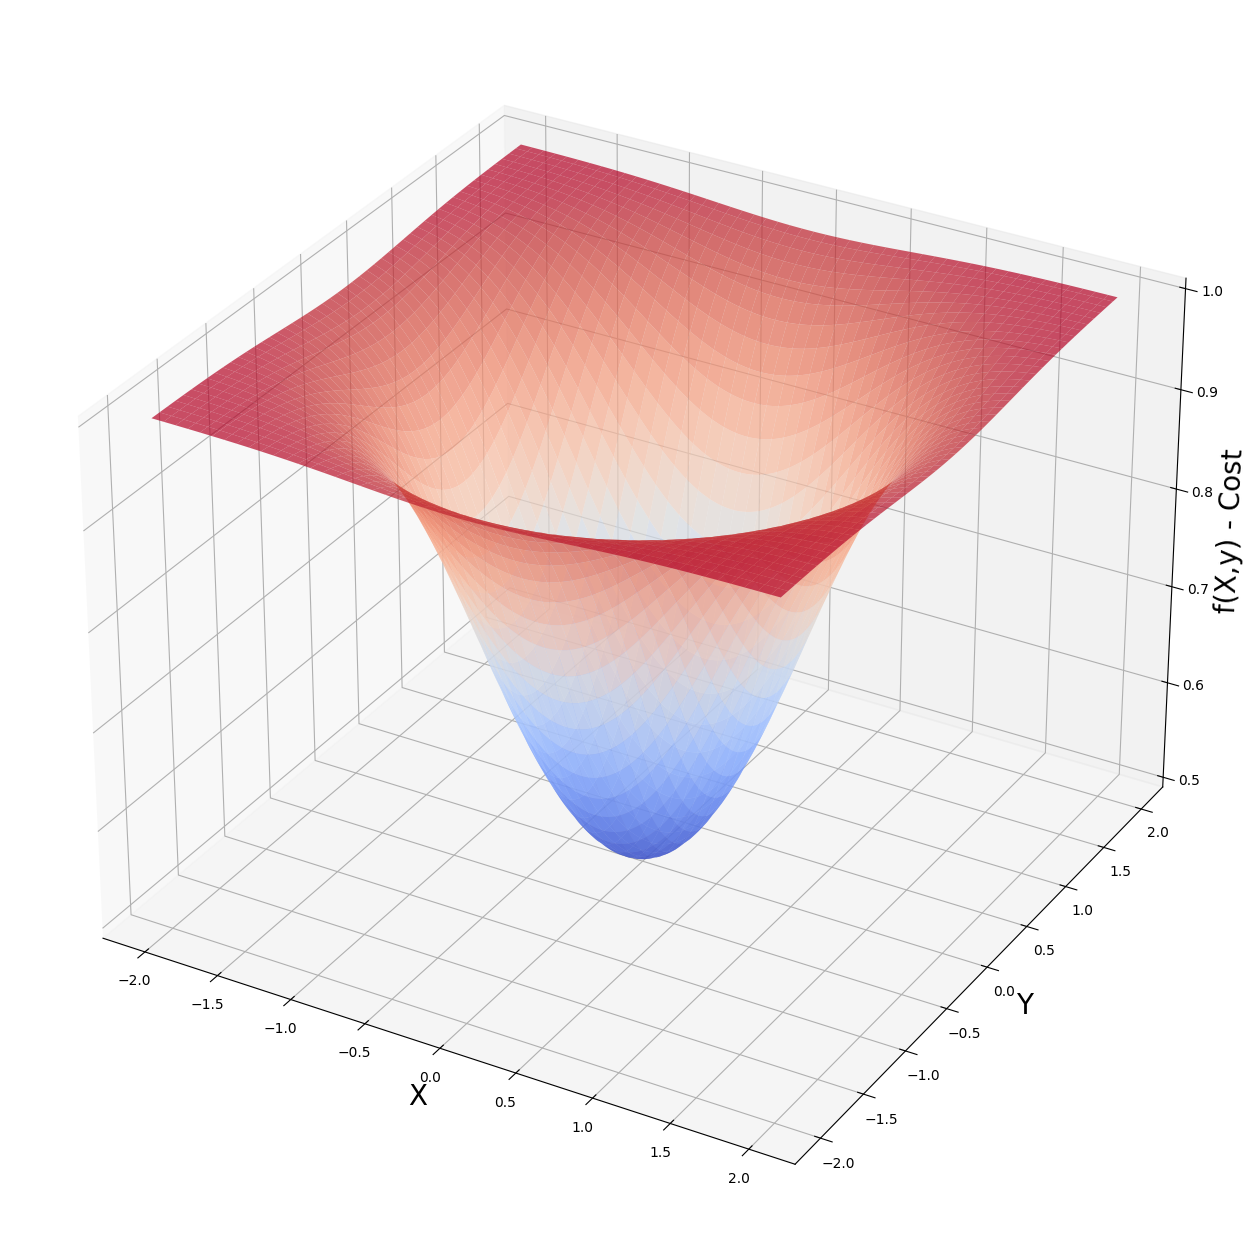

In [20]:
# Generating 3D plot
fig = plt.figure(figsize= [16,16])
ax = plt.axes(projection = '3d')

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(X,y) - Cost', fontsize = 20)

ax.plot_surface(X,y,np.array(f(X,y)), cmap = cm.coolwarm, alpha = 0.7)
plt.show()

### Partial Derivatives & Symbolic Computation
### $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{( 3^ { -x^2 - y^2 }+1)^2}$$
### $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{( 3^ { -x^2 - y^2 }+1)^2}$$

In [21]:
a, b = symbols('x,y')
print('Out cost function f(x,y) is:', f(a,b))
print('Partial derivative wrt x is:', diff(f(a,b),a))
print('Partial derivative wrt y is:', diff(f(a,b),b))
print('Value of f(x,y) at x=1.8 y=1.0 is:',f(a,b).evalf(subs={a:1.8,b:1.0})) # evaluate cost function at x = 1.8 and y = 1.0
print('Value of partial derivative wrt x at x=1.8 y=1.0 is:',diff(f(a,b),a).evalf(subs={a:1.8,b:1.0})) # evaluate cost function at x = 1.8 and y = 1.0

Out cost function f(x,y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Partial derivative wrt y is: 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is: 0.990604794032582
Value of partial derivative wrt x at x=1.8 y=1.0 is: 0.0368089716197505


### Batch Gradient Descent with Sympy
**Calculating gradient with SymPy:**<br>

This is a slower process because FOR loop will perform diff every single iteration

In [22]:
learning_rate = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    params = params - learning_rate * gradients

print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of: 3.45838599885832e-11
Minimum occurs at y value of: 1.92132555492129e-11
The cost is: 0.500000000000000


**Calculating Gradient by Providing partial derivative function:**<br>

This will be much faster because you don't need to calculate partial derivative in the FOR loop

In [23]:
# Partial derivative functions

def fpx(x,y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2

def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2

In [24]:
learning_rate = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - learning_rate * gradients

print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


### Graphing 3D Gradient Descent & Adv Numpy Arrays

In [25]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought','MC'],['Questlove', 'Drums']])
print(hs_band.shape)

# Selecting array
print('selecting the first row hs_band[0]:', hs_band[0])
print('hs_band[0][0]:', hs_band[0][0])

# axis is a really confusing parameters
# axis = 0 means adding element in row
# axis = 1 means adding element in column
the_roots = np.append(arr=hs_band, values = kirk.reshape(2,1) , axis = 1) # adding column
print(the_roots)

the_roots = np.append(arr=hs_band, values = kirk , axis = 0) # adding row
print(the_roots)

print('Printing names', the_roots[:, 0]) # print first column

(1, 2)
(2, 2)
selecting the first row hs_band[0]: ['Black Thought' 'MC']
hs_band[0][0]: Black Thought
[['Black Thought' 'MC' 'Captain']
 ['Questlove' 'Drums' 'Guitar']]
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing names ['Black Thought' 'Questlove' 'Captain']


In [26]:
learning_rate = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess
values_array = params
print(values_array.shape) ## 2 rows
values_array = params.reshape(1,2) # convert to 1 row 2 column
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - learning_rate * gradients
    values_array = np.append(arr=values_array, values=params.reshape(1,2),axis=0)
    # alternatively, you can append with concatenate operation as well
    #values_array = np.concatenate((values_array, params.reshape(1,2)),axis=0)

print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

(2,)
(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


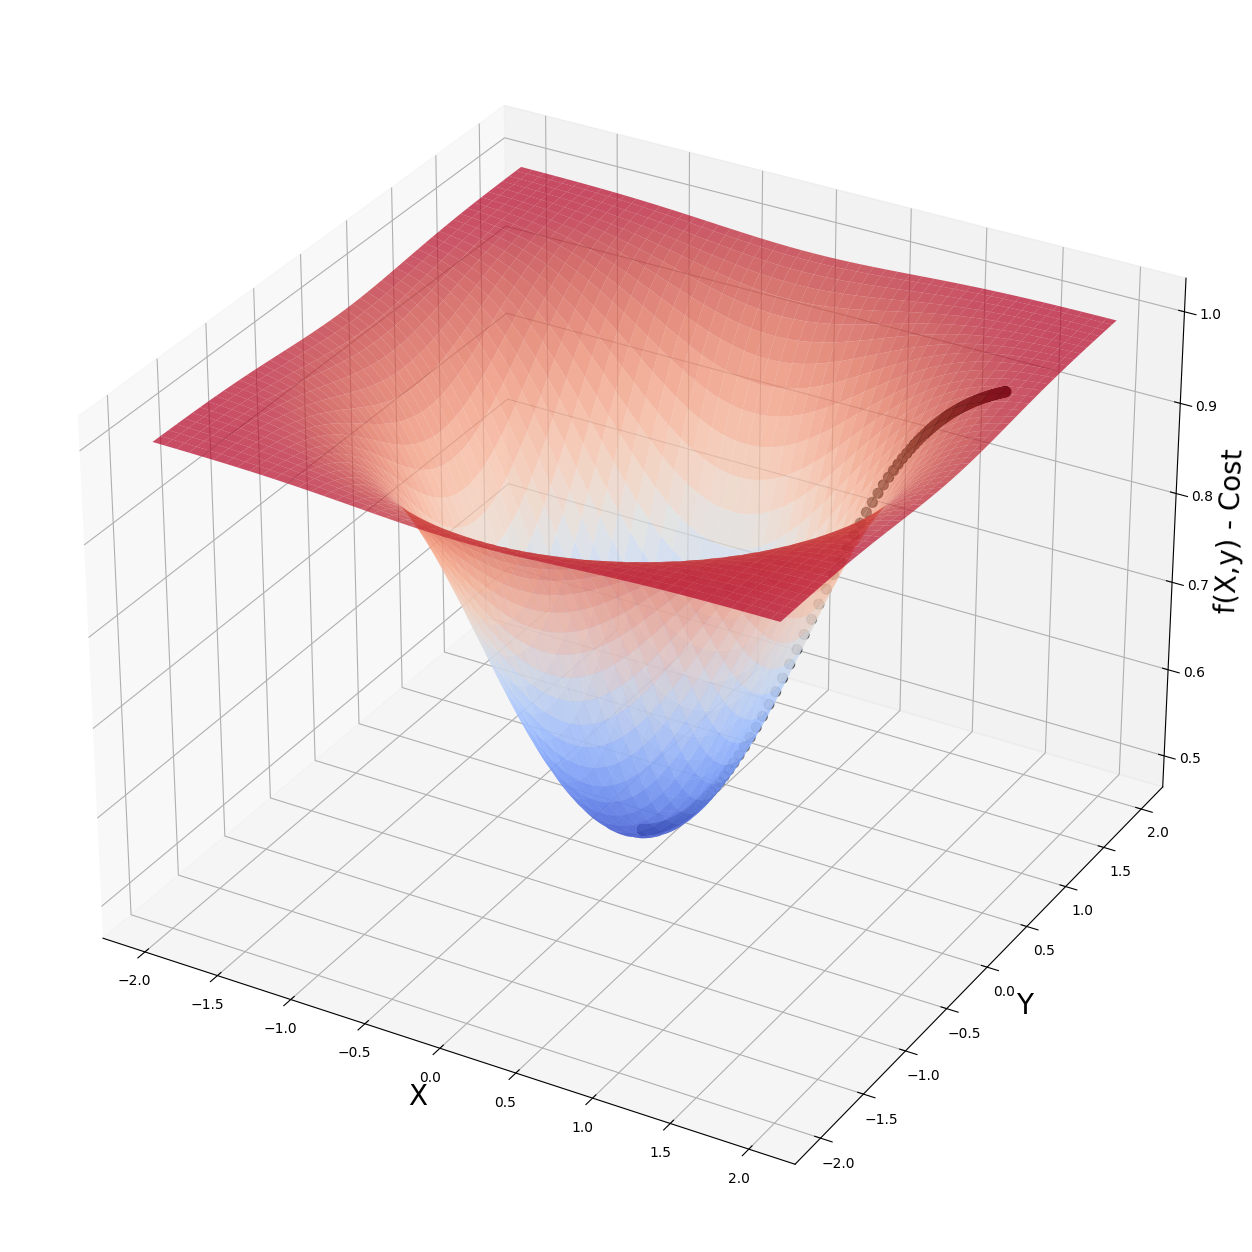

In [27]:
# Generating 3D plot
fig = plt.figure(figsize= [16,16])
ax = plt.axes(projection = '3d')

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(X,y) - Cost', fontsize = 20)

ax.plot_surface(X,y,np.array(f(X,y)), cmap = cm.coolwarm, alpha = 0.7)
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0],values_array[:,1]), s = 50, color = 'black')

plt.show()